Consider a suitable dataset. For clustering of data instances in different groups, apply different clustering techniques (minimum2).Visualize the clusters using suitable tool.

26 Aug 2020

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [2]:
tdata=load_iris()
print(dir(tdata))
# print(tdata.DESCR)
print(tdata.data[23])
print(tdata.target[23])
print(tdata.feature_names)
print(tdata.target_names)


['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']
[5.1 3.3 1.7 0.5]
0
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [3]:
pl=[]
pw=[]
for i in tdata.data:
    pl.append(i[2])
    pw.append(i[3])
tdata=pd.DataFrame({"petal length (cm)":pl,"petal width (cm)":pw})
print(tdata.head())

   petal length (cm)  petal width (cm)
0                1.4               0.2
1                1.4               0.2
2                1.3               0.2
3                1.5               0.2
4                1.4               0.2


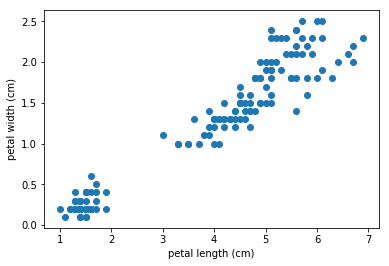

In [4]:
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.scatter(tdata["petal length (cm)"],tdata["petal width (cm)"])

In [5]:
sc=MinMaxScaler()
sc.fit(tdata[["petal width (cm)"]])
tdata["petal width (cm)"]=sc.transform(tdata[["petal width (cm)"]])
sc.fit(tdata[["petal length (cm)"]])
tdata["petal length (cm)"]=sc.transform(tdata[["petal length (cm)"]])
print(tdata.head())

   petal length (cm)  petal width (cm)
0           0.067797          0.041667
1           0.067797          0.041667
2           0.050847          0.041667
3           0.084746          0.041667
4           0.067797          0.041667


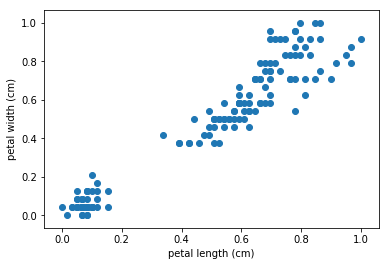

In [6]:
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.scatter(tdata["petal length (cm)"],tdata["petal width (cm)"])

In [7]:
sse=[]
for i in range(1,25):
    mdl=KMeans(n_clusters=i)
    mdl.fit(tdata[["petal length (cm)","petal width (cm)"]])
    sse.append(mdl.inertia_)
print(sse)

[28.368353219727194, 5.176463590044367, 1.7018746881920965, 1.1588792731667126, 0.8535683225340073, 0.6806539059219306, 0.5656776810037092, 0.48580845539143697, 0.41632758100216805, 0.3659086896974334, 0.33313800583351716, 0.30622719048868696, 0.2668647166456704, 0.2474087191869337, 0.22890798903276346, 0.20616433354023683, 0.2002964389807898, 0.18438730619153512, 0.17020421492823629, 0.1595061486150314, 0.153297756579448, 0.13750667890051027, 0.13414878655913692, 0.12409102912254255]


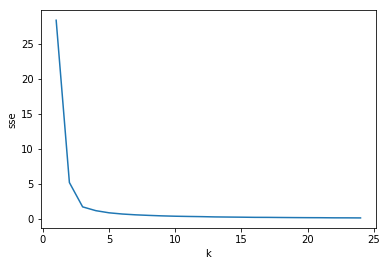

In [8]:
plt.xlabel("k")
plt.ylabel("sse")
plt.plot(list(range(1,25)),sse)

In [9]:
model=KMeans(n_clusters=3)
tdata["prediction"]=model.fit_predict(tdata[["petal length (cm)","petal width (cm)"]])
print(list(tdata["prediction"]))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


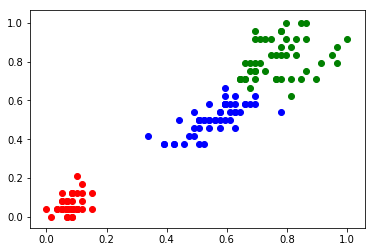

In [10]:
df1 = tdata[tdata.prediction==0]
df2 = tdata[tdata.prediction==1]
df3 = tdata[tdata.prediction==2]
plt.scatter(df1["petal length (cm)"],df1['petal width (cm)'],color='green')
plt.scatter(df2["petal length (cm)"],df2['petal width (cm)'],color='red')
plt.scatter(df3["petal length (cm)"],df3['petal width (cm)'],color='blue')